In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import seaborn as sns

In [2]:
df1 = pd.read_csv('NS_patch_r10_D01_b1.csv')
df17 = pd.read_csv('NS_patch_r10_D025_b1.csv')
df2 = pd.read_csv('NS_patch_r10_D05_b1.csv')
df3 = pd.read_csv('NS_patch_r10_D075_b1.csv')
df4 = pd.read_csv('NS_patch_r10_D10_b1.csv')

df5 = pd.read_csv('NS_patch_r20_D01_b1.csv')
df18 = pd.read_csv('NS_patch_r20_D025_b1.csv')
df6 = pd.read_csv('NS_patch_r20_D05_b1.csv')
df7 = pd.read_csv('NS_patch_r20_D075_b1.csv')
df8 = pd.read_csv('NS_patch_r20_D10_b1.csv')

df9 = pd.read_csv('NS_patch_r10_D01_b2.csv')
df19 = pd.read_csv('NS_patch_r10_D025_b2.csv')
df10 = pd.read_csv('NS_patch_r10_D05_b2.csv')
df11 = pd.read_csv('NS_patch_r10_D075_b2.csv')
df12 = pd.read_csv('NS_patch_r10_D10_b2.csv')

df13 = pd.read_csv('NS_patch_r20_D01_b2.csv')
df20 = pd.read_csv('NS_patch_r20_D025_b2.csv')
df14 = pd.read_csv('NS_patch_r20_D05_b2.csv')
df15 = pd.read_csv('NS_patch_r20_D075_b2.csv')
df16 = pd.read_csv('NS_patch_r20_D10_b2.csv')
dflist = [df1, df17, df2, df3, df4, df5, df18, df6, df7, df8, df9, df19, df10, df11, df12, df13, df20, df14, df15, df16]

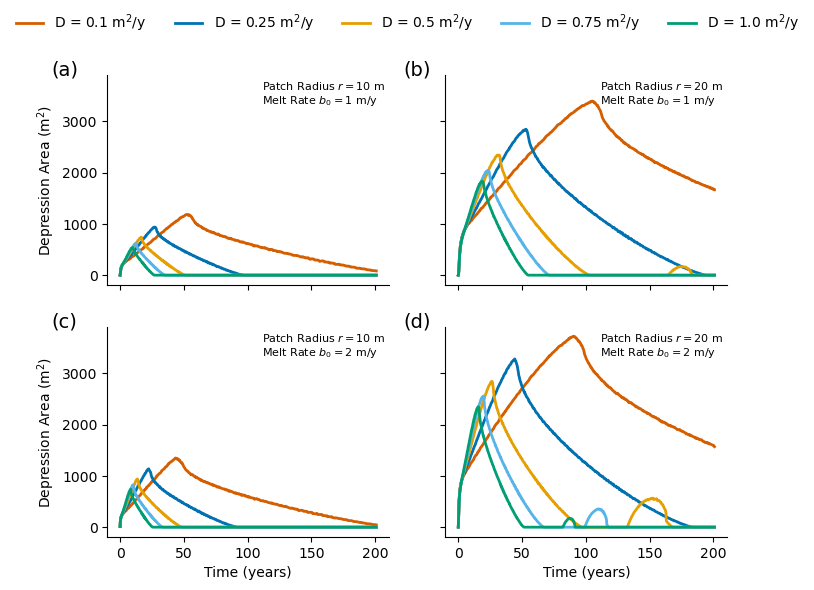

In [23]:
fig, ax = plt.subplots(2,2, figsize = (8, 6), sharex = True, sharey = True)
count = 1
Dlist = [0.1, 0.25, 0.5, 0.75, 1.0]
colors = [ '#D55E00', '#0072B2','#E69F00', '#56B4E9', '#009E73']
c_count = 0
for df in dflist:
    if count < 6:
        ax[0,0].plot(df['time(y)'], df['dep_area(m^2)'], color = colors[c_count], linewidth = 2)
        c_count += 1
    if count > 5 and count < 11:
        ax[0,1].plot(df['time(y)'], df['dep_area(m^2)'], color = colors[c_count], linewidth = 2)
        c_count += 1
    if count > 10 and count < 16:
        ax[1,0].plot(df['time(y)'], df['dep_area(m^2)'], color = colors[c_count], linewidth = 2)
        c_count += 1
    if count > 15:
        ax[1,1].plot(df['time(y)'], df['dep_area(m^2)'], color = colors[c_count], linewidth = 2)
        c_count += 1

    count += 1
    if c_count > 4:
        c_count = 0

ax[0,0].annotate("Patch Radius $r=10$ m\nMelt Rate $b_0= 1$ m/y", xy = (0.55, 0.86), xycoords = 'axes fraction', fontsize = 8)
ax[0,1].annotate("Patch Radius $r=20$ m\nMelt Rate $b_0= 1$ m/y", xy = (0.55, 0.86), xycoords = 'axes fraction', fontsize = 8)
ax[1,0].annotate("Patch Radius $r=10$ m\nMelt Rate $b_0= 2$ m/y", xy = (0.55, 0.86), xycoords = 'axes fraction', fontsize = 8)
ax[1,1].annotate("Patch Radius $r=20$ m\nMelt Rate $b_0= 2$ m/y", xy = (0.55, 0.86), xycoords = 'axes fraction', fontsize = 8)

ax[0,0].set_ylabel("Depression Area (m$^2$)")
ax[1,0].set_ylabel("Depression Area (m$^2$)")
ax[1,0].set_xlabel("Time (years)")
ax[1,1].set_xlabel("Time (years)")

ax[0,0].annotate("(a)", xy = (-0.2, 1), xycoords = 'axes fraction', fontsize = 14)
ax[0,1].annotate("(b)", xy = (-0.15, 1), xycoords = 'axes fraction', fontsize = 14)
ax[1,0].annotate("(c)", xy = (-0.2, 1), xycoords = 'axes fraction', fontsize = 14)
ax[1,1].annotate("(d)", xy = (-0.15, 1), xycoords = 'axes fraction', fontsize = 14)

labels = ["D = " + str(Dlist[i]) + ' m$^2$/y' for i in range(5)]
fig.legend(labels = labels, fontsize = 10, framealpha = 0, ncols = 5, loc = 'upper center')
sns.despine()
plt.savefig('no-drainage-Avstime.png', dpi = 300)
plt.show()

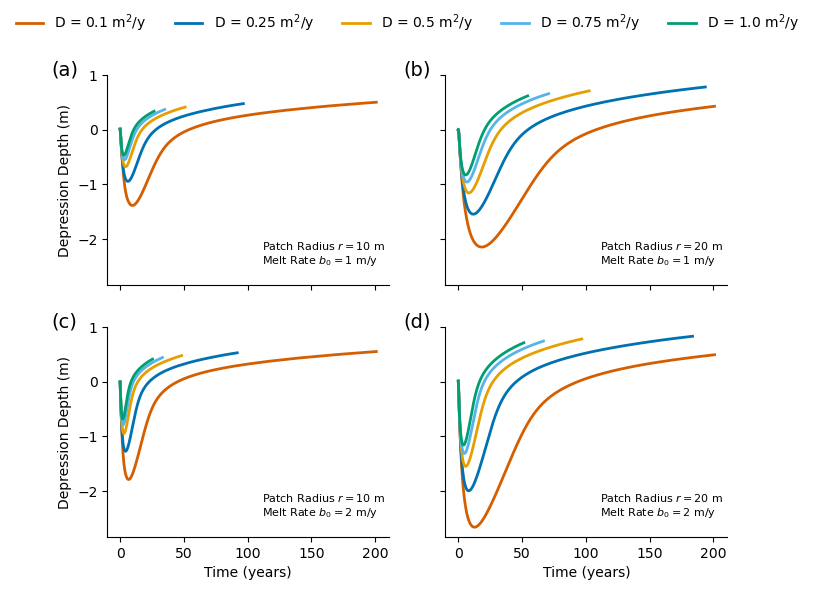

In [24]:
fig, ax = plt.subplots(2,2, figsize = (8, 6), sharex = True, sharey = True)
count = 1
Dlist = [0.1, 0.25, 0.5, 0.75, 1.0]
colors = [ '#D55E00', '#0072B2','#E69F00', '#56B4E9', '#009E73']
c_count = 0
for df in dflist:
    zero_i = df.index[df['mp_elev(m)'] == 0]
    if len(zero_i) >= 2:
        second_zero_i = zero_i[1]
        keep_rows = df.index.get_loc(second_zero_i)-1
        df = df.iloc[:keep_rows]
        
    if count < 6:
        ax[0,0].plot(df['time(y)'], -df['mp_elev(m)'], color = colors[c_count], linewidth = 2)
        c_count += 1
    if count > 5 and count < 11:
        ax[0,1].plot(df['time(y)'], -df['mp_elev(m)'], color = colors[c_count], linewidth = 2)
        c_count += 1
    if count > 10 and count < 16:
        ax[1,0].plot(df['time(y)'], -df['mp_elev(m)'], color = colors[c_count], linewidth = 2)
        c_count += 1
    if count > 15:
        ax[1,1].plot(df['time(y)'], -df['mp_elev(m)'], color = colors[c_count], linewidth = 2)
        c_count += 1

    count += 1
    if c_count > 4:
        c_count = 0

ax[0,0].annotate("Patch Radius $r=10$ m\nMelt Rate $b_0= 1$ m/y", xy = (0.55, 0.1), xycoords = 'axes fraction', fontsize = 8)
ax[0,1].annotate("Patch Radius $r=20$ m\nMelt Rate $b_0= 1$ m/y", xy = (0.55, 0.1), xycoords = 'axes fraction', fontsize = 8)
ax[1,0].annotate("Patch Radius $r=10$ m\nMelt Rate $b_0= 2$ m/y", xy = (0.55, 0.1), xycoords = 'axes fraction', fontsize = 8)
ax[1,1].annotate("Patch Radius $r=20$ m\nMelt Rate $b_0= 2$ m/y", xy = (0.55, 0.1), xycoords = 'axes fraction', fontsize = 8)

ax[0,0].set_ylabel("Depression Depth (m)")
ax[1,0].set_ylabel("Depression Depth (m)")
ax[1,0].set_xlabel("Time (years)")
ax[1,1].set_xlabel("Time (years)")

ax[0,0].annotate("(a)", xy = (-0.2, 1), xycoords = 'axes fraction', fontsize = 14)
ax[0,1].annotate("(b)", xy = (-0.15, 1), xycoords = 'axes fraction', fontsize = 14)
ax[1,0].annotate("(c)", xy = (-0.2, 1), xycoords = 'axes fraction', fontsize = 14)
ax[1,1].annotate("(d)", xy = (-0.15, 1), xycoords = 'axes fraction', fontsize = 14)

labels = ["D = " + str(Dlist[i]) + ' m$^2$/y' for i in range(5)]
fig.legend(labels = labels, fontsize = 10, framealpha = 0, ncols = 5, loc = 'upper center')
sns.despine()
plt.savefig('no-drainage-dvstime.png', dpi = 300)
plt.show()

In [6]:
Dlist = [0.1, 0.25, 0.5, 0.75, 1.]
rlist = [10, 20]
blist = [1, 2]
tau = []
R = []
for b in blist:
    for r in rlist:
        for D in Dlist:
            tau.append(r**2 *1.58/ D)
            R.append(b * r**2 *1.58/ D)
tau = np.array(tau)
R = np.array(R)

In [7]:
maxAt = []
maxA = []
for df in dflist:
    val = np.where(df['dep_area(m^2)'] == df['dep_area(m^2)'].max())[0][-1]
    maxA.append(df['dep_area(m^2)'][val])
    maxAt.append(df['time(y)'][val])

In [11]:
maxDt = []
maxD = []
for df in dflist:
    val = np.where(df['mp_elev(m)'] == df['mp_elev(m)'].max())[0][0]
    maxDt.append(df['time(y)'][val])
    maxD.append(df['mp_elev(m)'].max())
maxDt = np.array(maxDt)
maxD = np.array(maxD)
print(maxDt)

[ 9.8  6.   4.2  3.4  3.  18.4 11.8  8.2  6.8  5.8  6.8  4.2  3.   2.4
  2.  12.8  8.2  5.8  4.8  4. ]


In [17]:
k = np.round(10**b1, 2)
exp = np.round(m1, 2)
print(k, exp)

0.36 0.63


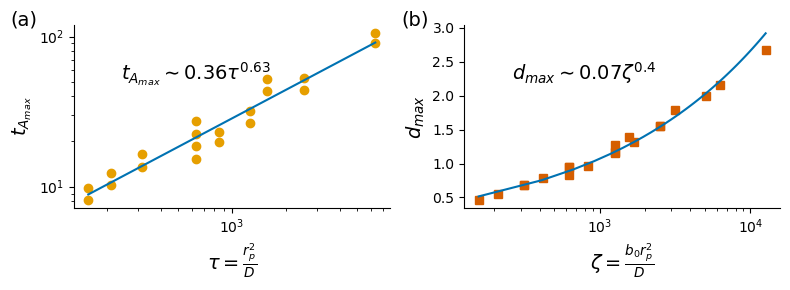

In [25]:
fig, ax = plt.subplots(1,2, figsize = (8,3))
m1, b1, r1, p1, se1 = linregress(np.log10(tau), np.log10(maxAt))
t = np.linspace(tau.min(), tau.max(), 50)

ax[0].loglog(tau, maxAt, 'o', color = "#E69F00")
ax[0].loglog(t, 10**b1*t**m1, color = '#0072B2')

ax[0].annotate("$t_{A_{max}} \\sim 0.36 \\tau^{0.63}$", xycoords = 'axes fraction', xy = (0.15, 0.7), fontsize = 14)
ax[0].set_ylabel("$t_{A_{max}}$", fontsize = 14)
ax[0].set_xlabel("$\\tau = \\frac{r_p^2}{D}$", fontsize = 14)

m, b, r, p, se = linregress(np.log10(R), np.log10(maxD))
Rtmp = np.linspace(R.min(), R.max(), 50)

ax[1].semilogx(R, maxD,'s', color = '#D55E00')
ax[1].semilogx(Rtmp, 10**b*Rtmp**m, color = '#0072B2')
ax[1].set_xlabel("$\\zeta = \\frac{b_0r_p^2}{D}$", fontsize = 14)
ax[1].set_ylabel("$d_{max}$", fontsize = 14)

ax[1].annotate("$d_{max} \\sim 0.07 \\zeta^{0.4}$", xycoords = 'axes fraction', xy = (0.15, 0.7), fontsize = 14)
ax[0].annotate("(a)", xy = (-0.2, 1), xycoords = 'axes fraction', fontsize = 14)
ax[1].annotate("(b)", xy = (-0.2, 1), xycoords = 'axes fraction', fontsize = 14)
sns.despine()
plt.tight_layout()
plt.savefig('no-drainage_scaling.png', dpi = 300)
plt.show()


In [186]:
maxAt/maxDt

array([5.22      , 4.25      , 3.60869565, 3.44444444, 3.0625    ,
       5.53684211, 4.32786885, 3.63636364, 3.22222222, 3.        ,
       6.38235294, 5.09090909, 4.25      , 3.92307692, 3.72727273,
       6.93846154, 5.26190476, 4.4       , 3.96      , 3.5       ])